# Transfer Learning - Comparing losses and accuracies for different standard algorithms, Confusion Matrix and Classification Report. 

Importing required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import sys
import shutil   
from keras import backend as K
from keras.models import Sequential
from keras import optimizers
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History 
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay
import keras
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import LeakyReLU
# from keras.layers.normalization import batch_normalization
keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)

import warnings
warnings.filterwarnings('ignore')
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
train = 'c:/Users/jadha/Data/MTP_data_underwater/Train'
val = 'c:/Users/jadha/Data/MTP_data_underwater/Val'
test = 'c:/Users/jadha/Data/MTP_data_underwater/Test'

In [3]:
# Total number of training images
num_of_train_samples = 0
for train_dataset in os.listdir(train):
    in_folder = train + "/" + train_dataset 
    in_folder_list = os.listdir(in_folder)
    num_of_train_samples = num_of_train_samples + len(in_folder_list)
print("Number of Training samples   : ",num_of_train_samples)

# Total number of validation images
num_of_validation_samples = 0
for validation_dataset in os.listdir(val):
    in_folder_val = val + "/" + validation_dataset
    in_folder_val_list = os.listdir(in_folder_val)
    num_of_validation_samples = num_of_validation_samples + len(in_folder_val_list)
print("Number of Validation samples : ", num_of_validation_samples)

# Total number of testing images
num_of_test_samples = 0
for testing_dataset in os.listdir(test):
    in_folder_test = test + "/" + testing_dataset
    in_folder_test_list = os.listdir(in_folder_test)
    num_of_test_samples = num_of_test_samples + len(in_folder_test_list)
print("Number of Test samples : ", num_of_test_samples)

Number of Training samples   :  459
Number of Validation samples :  90
Number of Test samples :  53


# Image Generator: 
Real time data augmentation, the data will be  looped over (in batches)

In [4]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen=ImageDataGenerator(rescale=1./255)

defining hyperparameters, image resolution and other stuffs...

In [5]:
batch_size = 64
learning_rate = 0.01
epoch = 50

# Defining image width and height respectively
img_rows = 256
img_cols = 256

In [6]:
train_generator = train_datagen.flow_from_directory(train,
                                                    target_size = (img_rows, img_cols),
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical')

validation_generator = val_datagen.flow_from_directory(val,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = batch_size,
                                                        shuffle = False, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = batch_size,
                                                        shuffle = False, class_mode='categorical')

Found 459 images belonging to 5 classes.
Found 90 images belonging to 5 classes.
Found 53 images belonging to 5 classes.


class_mode = 'binary' (2 output classes) ---- if more class prefer class_mode = 'categorical'.

Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch

# ResNet50

In [17]:
steps_per_epoch = num_of_train_samples // batch_size
print("Steps per epoch: ",steps_per_epoch)

Steps per epoch:  7


In [18]:
from keras.applications import ResNet50
# The sequential API allows you to create models layer-by-layer
resnet_model = Sequential()
resnet_model.add(ResNet50(include_top=False, 
                   pooling='max', 
                   weights='imagenet'))
resnet_model.add(Dense(5, activation="softmax"))

# Summary: to find the number of parameters
resnet_model.layers[0].trainable=False
resnet_model.summary()

adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
resnet_model.compile(loss="categorical_crossentropy",
              optimizer=adam,
              metrics=["accuracy"])


warnings.filterwarnings('ignore')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_1 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 23,597,957
Trainable params: 10,245
Non-trainable params: 23,587,712
_________________________________________________________________


In [19]:
# Trains the model for a given number of epochs (iterations on a dataset).
resnet_training = resnet_model.fit_generator(train_generator,
                               epochs = epoch,
                               validation_data = validation_generator)


Epoch 1/50
8/8 [==============================] - 79s 8s/step - loss: 11.5495 - accuracy: 0.2397 - val_loss: 24.7081 - val_accuracy: 0.2111
Epoch 2/50
8/8 [==============================] - 65s 8s/step - loss: 13.1781 - accuracy: 0.2658 - val_loss: 6.8705 - val_accuracy: 0.2222
Epoch 3/50
8/8 [==============================] - 61s 8s/step - loss: 7.1940 - accuracy: 0.2397 - val_loss: 7.3862 - val_accuracy: 0.1778
Epoch 4/50
8/8 [==============================] - 65s 8s/step - loss: 4.5836 - accuracy: 0.2222 - val_loss: 3.9106 - val_accuracy: 0.2444
Epoch 5/50
8/8 [==============================] - 62s 8s/step - loss: 2.8808 - accuracy: 0.2723 - val_loss: 2.6509 - val_accuracy: 0.3111
Epoch 6/50
8/8 [==============================] - 61s 7s/step - loss: 2.2730 - accuracy: 0.2919 - val_loss: 1.7606 - val_accuracy: 0.3111
Epoch 7/50
8/8 [==============================] - 63s 8s/step - loss: 1.9954 - accuracy: 0.3922 - val_loss: 3.1621 - val_accuracy: 0.2111
Epoch 8/50
8/8 [===============

In [20]:
    resnet_training.history

{'loss': [11.549517631530762,
  13.178132057189941,
  7.194024085998535,
  4.583614349365234,
  2.8808231353759766,
  2.2729721069335938,
  1.9953608512878418,
  2.1704845428466797,
  2.264360189437866,
  2.074789047241211,
  1.854945421218872,
  1.729630470275879,
  1.8473418951034546,
  1.7231053113937378,
  1.88457453250885,
  1.8954520225524902,
  1.5848667621612549,
  1.506740689277649,
  1.9703681468963623,
  1.9432957172393799,
  1.6576076745986938,
  1.676135540008545,
  1.850598931312561,
  2.0523838996887207,
  2.040844202041626,
  2.06952166557312,
  1.7285972833633423,
  1.5747253894805908,
  2.211167573928833,
  2.2155637741088867,
  1.6465519666671753,
  2.398009777069092,
  2.031409502029419,
  1.94321870803833,
  1.6390888690948486,
  2.0975921154022217,
  1.8706022500991821,
  1.8431259393692017,
  1.402464747428894,
  1.461214542388916,
  1.7121007442474365,
  1.6829254627227783,
  1.5811201333999634,
  1.790016770362854,
  1.671852707862854,
  1.902544379234314,
  1.

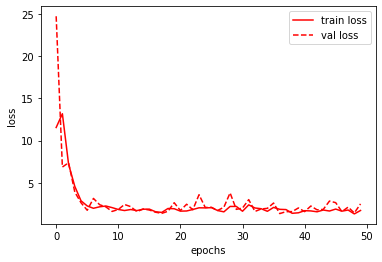

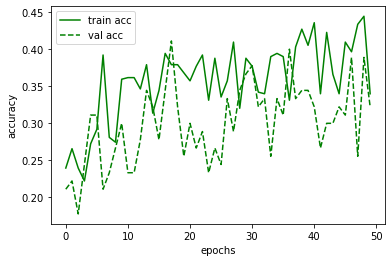

In [21]:
import matplotlib.pyplot as plt
plt.plot(resnet_training.history['loss'], label='train loss',color='r')
plt.plot(resnet_training.history['val_loss'], label='val loss',color='r',linestyle='--',)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(resnet_training.history['accuracy'], label='train acc',color='g')
plt.plot(resnet_training.history['val_accuracy'], label='val acc',color='g',linestyle='--')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
# plt.savefig('AccVal_acc')

# Saving the model history for ResNet - 50

In [22]:
training_accuracy_resnet      = resnet_training.history['accuracy'][-1]
training_loss_resnet          = resnet_training.history['loss'][-1]
validation_accuracy_resnet    = resnet_training.history['val_accuracy'][-1]
validation_loss_resnet        = resnet_training.history['val_loss'][-1]
print("Training Accuracy ResNet   :", training_accuracy_resnet )
print("Training Loss ResNet       :", training_loss_resnet)
print("Validation Accuracy ResNet :", validation_accuracy_resnet)
print("Validation Loss ResNet     :", validation_loss_resnet)

Training Accuracy ResNet   : 0.33986929059028625
Training Loss ResNet       : 1.7354729175567627
Validation Accuracy ResNet : 0.3222222328186035
Validation Loss ResNet     : 2.513594627380371


# Generating Confusion Matrix and Classification Report for ResNet 50

In [23]:
# Generating Confusion Matrix and Classification Report
Y_pred_res = resnet_model.predict_generator(validation_generator, num_of_validation_samples // batch_size+1)
y_pred_res = np.argmax(Y_pred_res, axis=1)
print('Confusion Matrix')
conf_matrix_res = confusion_matrix(validation_generator.classes, y_pred_res)
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['Catla','Mrigal','Rohu','Tilapia','Tuna']
class_rep_res = classification_report(validation_generator.classes, y_pred_res, target_names=target_names)
print(class_rep_res)


Confusion Matrix
[[ 0  0  0 19  1]
 [ 0  0  0 19  1]
 [ 0  0  0 16  0]
 [ 0  0  0 19  0]
 [ 0  0  0  5 10]]
Classification Report
              precision    recall  f1-score   support

       Catla       0.00      0.00      0.00        20
      Mrigal       0.00      0.00      0.00        20
        Rohu       0.00      0.00      0.00        16
     Tilapia       0.24      1.00      0.39        19
        Tuna       0.83      0.67      0.74        15

    accuracy                           0.32        90
   macro avg       0.22      0.33      0.23        90
weighted avg       0.19      0.32      0.21        90



# Inception

# VGG16

In [24]:
epoch_vgg = 50
learning_rate_vgg = 0.01
batch_size_vgg = 64
steps_per_epoch_vgg = num_of_train_samples // batch_size_vgg
print("Steps per epoch: ",steps_per_epoch_vgg)

Steps per epoch:  7


In [25]:
from keras.applications import vgg16
    # The sequential API allows you to create models layer-by-layer
vgg_model=Sequential()
vgg_model.add(vgg16.VGG16(include_top = False, pooling = 'max', weights = 'imagenet'))
vgg_model.add(Dense(5, activation="softmax"))

    # Summary: to find the number of parameters
vgg_model.layers[0].trainable=False
vgg_model.summary() 

adam = optimizers.Adam(lr=learning_rate_vgg, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
vgg_model.compile(loss="categorical_crossentropy",
                  optimizer=adam,
                  metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_2 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 14,717,253
Trainable params: 2,565
Non-trainable params: 14,714,688
_________________________________________________________________


In [26]:
# Trains the model for a given number of epochs (iterations on a dataset).
vgg_training = vgg_model.fit_generator(train_generator,
                                       steps_per_epoch = steps_per_epoch_vgg,
                                       epochs = epoch_vgg,
                                       validation_data = validation_generator,
                                       validation_steps = num_of_validation_samples // batch_size_vgg)

Epoch 1/50
7/7 [==============================] - 101s 14s/step - loss: 2.0848 - accuracy: 0.3316 - val_loss: 1.5773 - val_accuracy: 0.2656
Epoch 2/50
7/7 [==============================] - 58s 8s/step - loss: 1.5067 - accuracy: 0.3544 - val_loss: 2.0027 - val_accuracy: 0.1562
Epoch 3/50
7/7 [==============================] - 58s 8s/step - loss: 1.2801 - accuracy: 0.4684 - val_loss: 1.5201 - val_accuracy: 0.2344
Epoch 4/50
7/7 [==============================] - 74s 11s/step - loss: 1.1588 - accuracy: 0.4658 - val_loss: 1.4200 - val_accuracy: 0.3125
Epoch 5/50
7/7 [==============================] - 65s 9s/step - loss: 1.0884 - accuracy: 0.5013 - val_loss: 1.4388 - val_accuracy: 0.3125
Epoch 6/50
7/7 [==============================] - 61s 8s/step - loss: 1.0498 - accuracy: 0.5646 - val_loss: 1.4799 - val_accuracy: 0.2188
Epoch 7/50
7/7 [==============================] - 61s 10s/step - loss: 1.0081 - accuracy: 0.5646 - val_loss: 1.2327 - val_accuracy: 0.4531
Epoch 8/50
7/7 [==============

In [27]:
vgg_training.history

{'loss': [2.084827184677124,
  1.5067229270935059,
  1.2800757884979248,
  1.1587958335876465,
  1.0883573293685913,
  1.0497568845748901,
  1.0080646276474,
  0.9557260274887085,
  0.9543726444244385,
  0.9575897455215454,
  0.9106816649436951,
  0.8496522307395935,
  0.8599057793617249,
  0.8865886926651001,
  0.9119340181350708,
  0.9024423956871033,
  0.8547598719596863,
  0.8607396483421326,
  0.845789909362793,
  0.8879757523536682,
  0.8541186451911926,
  0.8086909651756287,
  0.8213946223258972,
  0.778682291507721,
  0.7992275357246399,
  0.7918182015419006,
  0.7649505138397217,
  0.7334784865379333,
  0.6872426271438599,
  0.7104077935218811,
  0.7047905325889587,
  0.7266071438789368,
  0.6993046402931213,
  0.7007738947868347,
  0.6950676441192627,
  0.7182539701461792,
  0.7190877199172974,
  0.7088232040405273,
  0.7084181904792786,
  0.6293202638626099,
  0.678654134273529,
  0.6720414757728577,
  0.6683332324028015,
  0.7077165246009827,
  0.6736013889312744,
  0.65879

# Model history for VGG

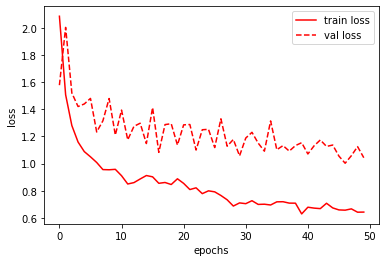

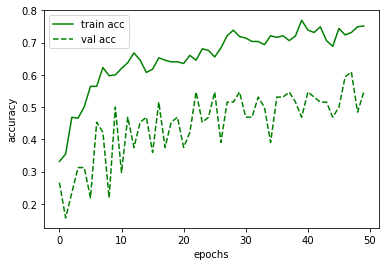

<Figure size 432x288 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
plt.plot(vgg_training.history['loss'], label='train loss',color='r')
plt.plot(vgg_training.history['val_loss'], label='val loss',color='r',linestyle='--',)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(vgg_training.history['accuracy'], label='train acc',color='g')
plt.plot(vgg_training.history['val_accuracy'], label='val acc',color='g',linestyle='--')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
plt.savefig('AccVal_acc')

In [29]:
training_accuracy_vgg      = vgg_training.history['accuracy'][-1]
training_loss_vgg          = vgg_training.history['loss'][-1]
validation_accuracy_vgg    = vgg_training.history['val_accuracy'][-1]
validation_loss_vgg        = vgg_training.history['val_loss'][-1]
print("Training Accuracy VGG    :", training_accuracy_vgg )
print("Training Loss VGG        :", training_loss_vgg)
print("Validation Accuracy VGG  :", validation_accuracy_vgg)
print("Validation Loss VGG      :", validation_loss_vgg)

Training Accuracy VGG    : 0.7518987059593201
Training Loss VGG        : 0.6428367495536804
Validation Accuracy VGG  : 0.546875
Validation Loss VGG      : 1.0432114601135254


# Confusion Matrix and Classification Report for VGG


In [30]:
# Generating Confusion Matrix and Classification Report
Y_pred_vgg = vgg_model.predict_generator(validation_generator, num_of_validation_samples // batch_size+1)
y_pred_vgg = np.argmax(Y_pred_vgg, axis=1)
print('Confusion Matrix')
conf_matrix_vgg = confusion_matrix(validation_generator.classes, y_pred_vgg)
cm_vgg = np.array2string(conf_matrix_vgg)
print(conf_matrix_vgg)
print("=============================================================================================")
print('Classification Report')
target_names = ['Catla','Mrigal','Rohu','Tilapia','Tuna']
class_rep_vgg = classification_report(validation_generator.classes, y_pred_vgg, target_names=target_names)
print(class_rep_vgg)

Confusion Matrix
[[19  1  0  0  0]
 [ 7  7  4  2  0]
 [ 6  3  3  4  0]
 [ 3  2  0 14  0]
 [ 1  0  0  1 13]]
Classification Report
              precision    recall  f1-score   support

       Catla       0.53      0.95      0.68        20
      Mrigal       0.54      0.35      0.42        20
        Rohu       0.43      0.19      0.26        16
     Tilapia       0.67      0.74      0.70        19
        Tuna       1.00      0.87      0.93        15

    accuracy                           0.62        90
   macro avg       0.63      0.62      0.60        90
weighted avg       0.62      0.62      0.59        90



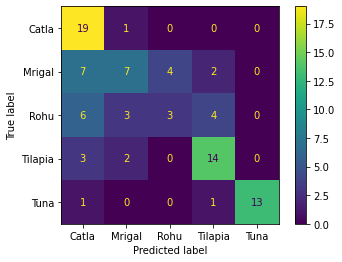

In [31]:
import matplotlib.pyplot as plt
disp=ConfusionMatrixDisplay(conf_matrix_vgg,display_labels=target_names)
disp.plot()
plt.show()

# VGG 19

In [17]:
epoch_vgg19 = 50
learning_rate_vgg = 0.01
batch_size_vgg19 = 64
steps_per_epoch_vgg19 = num_of_train_samples // batch_size_vgg19
print("Steps per epoch: ",steps_per_epoch_vgg19)

Steps per epoch:  7


In [18]:
from keras.applications import vgg19
    # The sequential API allows you to create models layer-by-layer
vgg19_model=Sequential()
vgg19_model.add(vgg19.VGG19(include_top = False, pooling = 'max', weights = 'imagenet'))
vgg19_model.add(Dense(5, activation="softmax"))

    # Summary: to find the number of parameters
vgg19_model.layers[0].trainable=False
vgg19_model.summary() 

adam = optimizers.Adam(lr=learning_rate_vgg, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
vgg19_model.compile(loss="categorical_crossentropy",
                  optimizer=adam,
                  metrics=["accuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 20,026,949
Trainable params: 2,565
Non-trainable params: 20,024,384
_________________________________________________________________


In [25]:
vgg19_training = vgg19_model.fit_generator(train_generator,
                                       steps_per_epoch = steps_per_epoch_vgg19,
                                       epochs = epoch_vgg19,
                                       validation_data = validation_generator)

Epoch 1/50
7/7 [==============================] - 72s 10s/step - loss: 0.7661 - accuracy: 0.7188 - val_loss: 0.9672 - val_accuracy: 0.5889
Epoch 2/50
7/7 [==============================] - 67s 10s/step - loss: 0.7619 - accuracy: 0.6911 - val_loss: 0.9041 - val_accuracy: 0.5889
Epoch 3/50
7/7 [==============================] - 67s 10s/step - loss: 0.7955 - accuracy: 0.6734 - val_loss: 0.9524 - val_accuracy: 0.5889
Epoch 4/50
7/7 [==============================] - 67s 10s/step - loss: 0.8046 - accuracy: 0.6633 - val_loss: 0.9125 - val_accuracy: 0.6000
Epoch 5/50
7/7 [==============================] - 4773s 794s/step - loss: 0.7828 - accuracy: 0.6709 - val_loss: 0.8881 - val_accuracy: 0.6667
Epoch 6/50
7/7 [==============================] - 77s 11s/step - loss: 0.7733 - accuracy: 0.6987 - val_loss: 1.1402 - val_accuracy: 0.5333
Epoch 7/50
7/7 [==============================] - 75s 11s/step - loss: 0.8244 - accuracy: 0.6430 - val_loss: 0.8542 - val_accuracy: 0.6889
Epoch 8/50
7/7 [========

In [26]:
vgg19_training.history

{'loss': [0.7660936713218689,
  0.7618724703788757,
  0.795522153377533,
  0.8045858144760132,
  0.7828087210655212,
  0.7732607126235962,
  0.8244401812553406,
  0.7348478436470032,
  0.7464927434921265,
  0.6777604818344116,
  0.7239195108413696,
  0.7244464159011841,
  0.7517414093017578,
  0.7408368587493896,
  0.7055361270904541,
  0.7042363286018372,
  0.7050526142120361,
  0.6732989549636841,
  0.6795474886894226,
  0.6665658950805664,
  0.6761276721954346,
  0.684819757938385,
  0.6995291113853455,
  0.643001139163971,
  0.6834372878074646,
  0.7545254230499268,
  0.650956392288208,
  0.6380807757377625,
  0.6992194652557373,
  0.6980813145637512,
  0.719163715839386,
  0.7103520035743713,
  0.7059105038642883,
  0.6790143847465515,
  0.7117334008216858,
  0.6855701804161072,
  0.646835446357727,
  0.643440842628479,
  0.6807886958122253,
  0.7260351777076721,
  0.7656981945037842,
  0.687237024307251,
  0.7524935007095337,
  0.7629517316818237,
  0.7380139231681824,
  0.737035

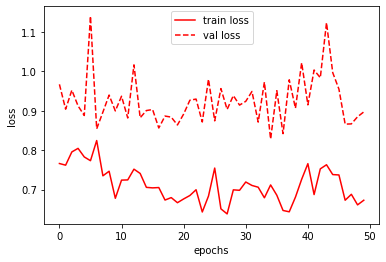

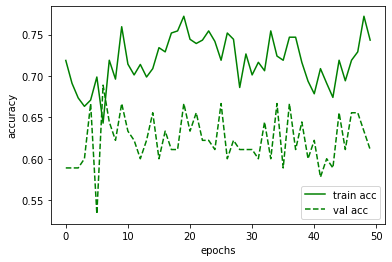

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
plt.plot(vgg19_training.history['loss'], label='train loss',color='r')
plt.plot(vgg19_training.history['val_loss'], label='val loss',color='r',linestyle='--',)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(vgg19_training.history['accuracy'], label='train acc',color='g')
plt.plot(vgg19_training.history['val_accuracy'], label='val acc',color='g',linestyle='--')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
plt.savefig('AccVal_acc')

In [28]:
training_accuracy_vgg19      = vgg19_training.history['accuracy'][-1]
training_loss_vgg19          = vgg19_training.history['loss'][-1]
validation_accuracy_vgg19    = vgg19_training.history['val_accuracy'][-1]
validation_loss_vgg19        = vgg19_training.history['val_loss'][-1]
print("Training Accuracy VGG    :", training_accuracy_vgg19 )
print("Training Loss VGG        :", training_loss_vgg19)
print("Validation Accuracy VGG  :", validation_accuracy_vgg19)
print("Validation Loss VGG      :", validation_loss_vgg19)

Training Accuracy VGG    : 0.7433035969734192
Training Loss VGG        : 0.6728376150131226
Validation Accuracy VGG  : 0.6111111044883728
Validation Loss VGG      : 0.8971623778343201


In [29]:
# Generating Confusion Matrix and Classification Report
Y_pred_vgg19 = vgg19_model.predict_generator(validation_generator, num_of_validation_samples // batch_size+1)
y_pred_vgg19 = np.argmax(Y_pred_vgg19, axis=1)
print('Confusion Matrix')
conf_matrix_vgg19 = confusion_matrix(validation_generator.classes, y_pred_vgg19)
cm_vgg19 = np.array2string(conf_matrix_vgg19)
print(conf_matrix_vgg19)
print("=============================================================================================")
print('Classification Report')
target_names = ['Catla','Mrigal','Rohu','Tilapia','Tuna']
class_rep_vgg19 = classification_report(validation_generator.classes, y_pred_vgg19, target_names=target_names)
print(class_rep_vgg19)

Confusion Matrix
[[18  0  1  1  0]
 [ 4  5  8  3  0]
 [ 8  3  3  2  0]
 [ 4  0  0 15  0]
 [ 0  0  0  1 14]]
Classification Report
              precision    recall  f1-score   support

       Catla       0.53      0.90      0.67        20
      Mrigal       0.62      0.25      0.36        20
        Rohu       0.25      0.19      0.21        16
     Tilapia       0.68      0.79      0.73        19
        Tuna       1.00      0.93      0.97        15

    accuracy                           0.61        90
   macro avg       0.62      0.61      0.59        90
weighted avg       0.61      0.61      0.58        90



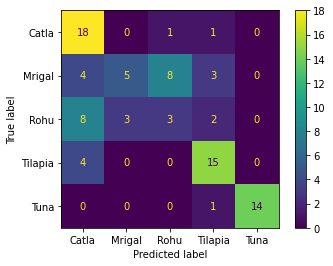

In [30]:
# import matplotlib.pyplot as plt
disp=ConfusionMatrixDisplay(conf_matrix_vgg19,display_labels=target_names)
disp.plot()
plt.show()

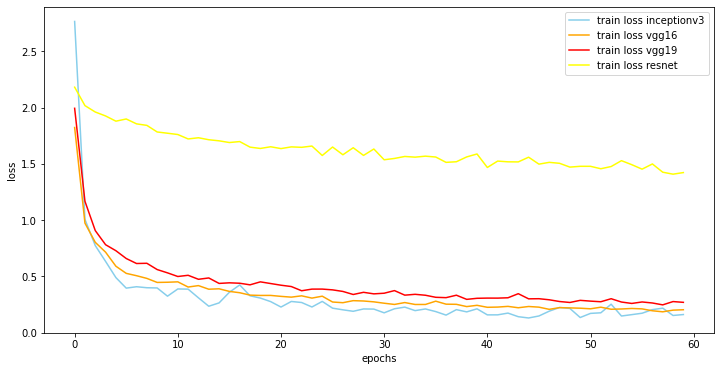

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(inc_training.history['loss'], label='train loss inceptionv3',color='skyblue')
# plt.plot(inc_training.history['val_loss'], label='val loss inceptionv3',linestyle='--',color='skyblue')

plt.plot(vgg_training.history['loss'], label='train loss vgg16',color='orange')
# plt.plot(vgg_training.history['val_loss'], label='val loss vgg16',linestyle='--',color='orange')

plt.plot(vgg19_training.history['loss'], label='train loss vgg19',color='red')
# plt.plot(vgg19_training.history['val_loss'], label='val loss vgg19',linestyle='--',color='red')

plt.plot(resnet_training.history['loss'], label='train loss resnet',color='yellow')
# plt.plot(resnet_training.history['val_loss'], label='val loss resnet',linestyle='--',color='yellow')

# plt.plot(cn_training.history['loss'], label='train loss custom network',color='green')
# plt.plot(cn_training.history['val_loss'], label='val loss  custom network',linestyle='--',color='green')

plt.legend(ncol=1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
# plt.savefig('LossVal_loss')

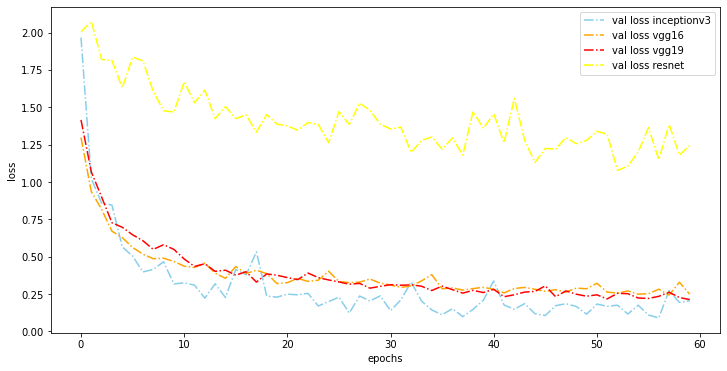

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# plt.plot(inc_training.history['loss'], label='train loss inceptionv3',color='skyblue')
plt.plot(inc_training.history['val_loss'], label='val loss inceptionv3',linestyle='-.',color='skyblue')

# plt.plot(vgg_training.history['loss'], label='train loss vgg16',color='orange')
plt.plot(vgg_training.history['val_loss'], label='val loss vgg16',linestyle='-.',color='orange')

# plt.plot(vgg19_training.history['loss'], label='train loss vgg19',color='red')
plt.plot(vgg19_training.history['val_loss'], label='val loss vgg19',linestyle='-.',color='red')

# plt.plot(resnet_training.history['loss'], label='train loss resnet',color='yellow')
plt.plot(resnet_training.history['val_loss'], label='val loss resnet',linestyle='-.',color='yellow')

# plt.plot(cn_training.history['loss'], label='train loss custom network',color='green')
# plt.plot(cn_training.history['val_loss'], label='val loss  custom network',linestyle='--',color='green')

plt.legend(ncol=1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
# plt.savefig('LossVal_loss')

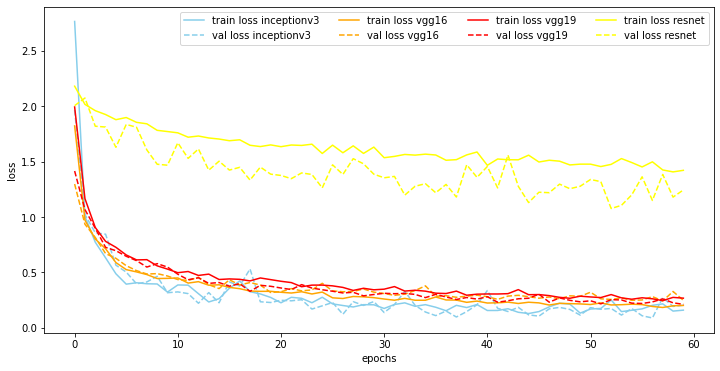

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(inc_training.history['loss'], label='train loss inceptionv3',color='skyblue')
plt.plot(inc_training.history['val_loss'], label='val loss inceptionv3',linestyle='--',color='skyblue')

plt.plot(vgg_training.history['loss'], label='train loss vgg16',color='orange')
plt.plot(vgg_training.history['val_loss'], label='val loss vgg16',linestyle='--',color='orange')

plt.plot(vgg19_training.history['loss'], label='train loss vgg19',color='red')
plt.plot(vgg19_training.history['val_loss'], label='val loss vgg19',linestyle='--',color='red')

plt.plot(resnet_training.history['loss'], label='train loss resnet',color='yellow')
plt.plot(resnet_training.history['val_loss'], label='val loss resnet',linestyle='--',color='yellow')

# plt.plot(cn_training.history['loss'], label='train loss custom network',color='green')
# plt.plot(cn_training.history['val_loss'], label='val loss  custom network',linestyle='--',color='green')

plt.legend(ncol=4)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
# plt.savefig('LossVal_loss')

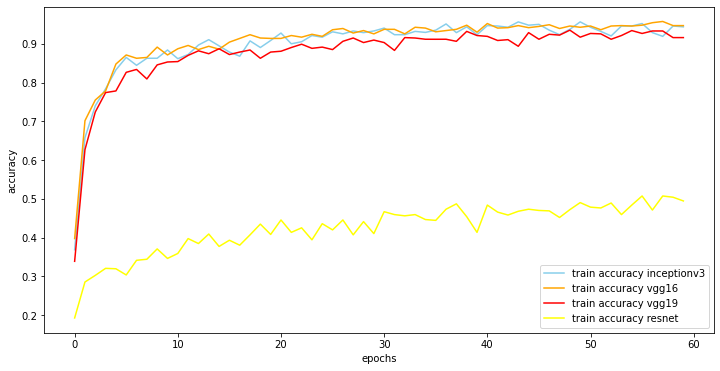

In [48]:
plt.figure(figsize=(12,6))
plt.plot(inc_training.history['accuracy'], label='train accuracy inceptionv3',color='skyblue')
# plt.plot(inc_training.history['val_accuracy'], label='val accuracy inceptionv3',linestyle='--',color='skyblue')

plt.plot(vgg_training.history['accuracy'], label='train accuracy vgg16',color='orange')
# plt.plot(vgg_training.history['val_accuracy'], label='val accuracy vgg16',linestyle='--',color='orange')

plt.plot(vgg19_training.history['accuracy'], label='train accuracy vgg19',color='red')
# plt.plot(vgg19_training.history['val_accuracy'], label='val accuracy vgg19',linestyle='--',color='red')

plt.plot(resnet_training.history['accuracy'], label='train accuracy resnet',color='yellow')
# plt.plot(resnet_training.history['val_accuracy'], label='val accuracy resnet',linestyle='--',color='yellow')

# plt.plot(cn_training.history['accuracy'], label='train accuracy custom network',color='green')
# plt.plot(cn_training.history['val_accuracy'], label='val accuracy  custom network',linestyle='--',color='green')


plt.legend(ncol=1)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.tight_layout
plt.show()

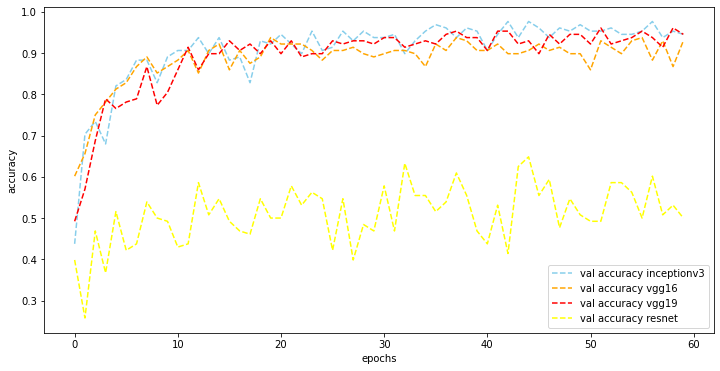

In [49]:
plt.figure(figsize=(12,6))
# plt.plot(inc_training.history['accuracy'], label='train accuracy inceptionv3',color='skyblue')
plt.plot(inc_training.history['val_accuracy'], label='val accuracy inceptionv3',linestyle='--',color='skyblue')

# plt.plot(vgg_training.history['accuracy'], label='train accuracy vgg16',color='orange')
plt.plot(vgg_training.history['val_accuracy'], label='val accuracy vgg16',linestyle='--',color='orange')

# plt.plot(vgg19_training.history['accuracy'], label='train accuracy vgg19',color='red')
plt.plot(vgg19_training.history['val_accuracy'], label='val accuracy vgg19',linestyle='--',color='red')

# plt.plot(resnet_training.history['accuracy'], label='train accuracy resnet',color='yellow')
plt.plot(resnet_training.history['val_accuracy'], label='val accuracy resnet',linestyle='--',color='yellow')

# plt.plot(cn_training.history['accuracy'], label='train accuracy custom network',color='green')
# plt.plot(cn_training.history['val_accuracy'], label='val accuracy  custom network',linestyle='--',color='green')


plt.legend(ncol=1)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.tight_layout
plt.show()

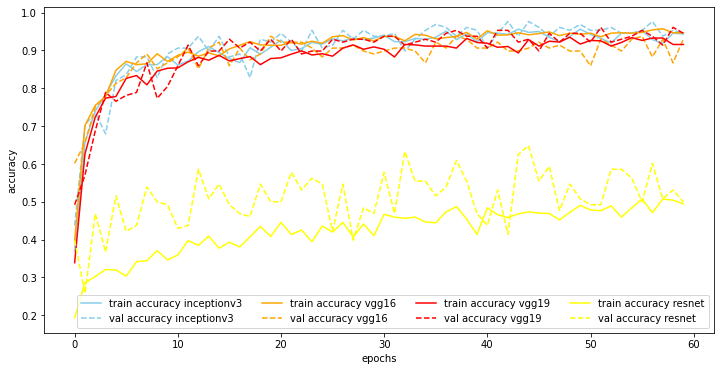

In [51]:
plt.figure(figsize=(12,6))
plt.plot(inc_training.history['accuracy'], label='train accuracy inceptionv3',color='skyblue')
plt.plot(inc_training.history['val_accuracy'], label='val accuracy inceptionv3',linestyle='--',color='skyblue')

plt.plot(vgg_training.history['accuracy'], label='train accuracy vgg16',color='orange')
plt.plot(vgg_training.history['val_accuracy'], label='val accuracy vgg16',linestyle='--',color='orange')

plt.plot(vgg19_training.history['accuracy'], label='train accuracy vgg19',color='red')
plt.plot(vgg19_training.history['val_accuracy'], label='val accuracy vgg19',linestyle='--',color='red')

plt.plot(resnet_training.history['accuracy'], label='train accuracy resnet',color='yellow')
plt.plot(resnet_training.history['val_accuracy'], label='val accuracy resnet',linestyle='--',color='yellow')

# plt.plot(cn_training.history['accuracy'], label='train accuracy custom network',color='green')
# plt.plot(cn_training.history['val_accuracy'], label='val accuracy  custom network',linestyle='--',color='green')


plt.legend(ncol=4)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.tight_layout
plt.show()

# Custom Network

In [74]:
epoch_cn = 60
learning_rate_cn = 0.001
batch_size_cn = 64
steps_per_epoch_cn = num_of_train_samples // batch_size_cn
print("Steps per epoch: ",steps_per_epoch_cn)

Steps per epoch:  15


In [75]:
# Custom network
model_cn = Sequential()
model_cn.add(Conv2D(16,(3,3),input_shape=(256,256,3),padding='same'))
model_cn.add(Activation('relu'))
# model_cn.add(BatchNormalization)
model_cn.add(MaxPooling2D(pool_size=(2,2)))

model_cn.add(Conv2D(32,(3,3),padding='same'))
model_cn.add(Activation('relu'))
# model_cn.add(BatchNormalization())
model_cn.add(MaxPooling2D(pool_size=(2,2)))
model_cn.add(Dropout(0.25))


model_cn.add(Conv2D(32,(3,3),padding='same'))
model_cn.add(Activation('relu'))
# model_cn.add(BatchNormalization())
model_cn.add(MaxPooling2D(pool_size=(2,2)))

model_cn.add(Conv2D(64,(3,3),padding='same'))
model_cn.add(Activation('relu'))
# model_cn.add(BatchNormalization())
model_cn.add(MaxPooling2D(pool_size=(2,2)))

model_cn.add(Flatten())
model_cn.add(Dense(256,activation='relu'))
#model.add(LeakyReLU(0.1))
model_cn.add(Dropout(0.5))
model_cn.add(Dense(9))
model_cn.add(Activation("softmax"))

model_cn.summary()


model_cn.compile(loss="categorical_crossentropy",
                  optimizer= 'adam',
                  metrics=["accuracy"])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 activation_94 (Activation)  (None, 256, 256, 16)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_95 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 activation_95 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

In [76]:
# Trains the model for a given number of epochs (iterations on a dataset).
cn_training = model_cn.fit_generator(train_generator,
                                       steps_per_epoch = steps_per_epoch_cn,
                                       epochs = epoch_cn,
                                       validation_data = validation_generator,
                                       validation_steps = num_of_validation_samples // batch_size_cn)

Epoch 1/30
15/15 [==============================] - 78s 5s/step - loss: 2.4628 - accuracy: 0.1458 - val_loss: 2.0391 - val_accuracy: 0.6250
Epoch 2/30
15/15 [==============================] - 68s 5s/step - loss: 2.0386 - accuracy: 0.1795 - val_loss: 2.1995 - val_accuracy: 0.0000e+00
Epoch 3/30
15/15 [==============================] - 69s 5s/step - loss: 2.0791 - accuracy: 0.2009 - val_loss: 2.1668 - val_accuracy: 0.0000e+00
Epoch 4/30
15/15 [==============================] - 72s 5s/step - loss: 2.0983 - accuracy: 0.1875 - val_loss: 2.1371 - val_accuracy: 0.5312
Epoch 5/30
15/15 [==============================] - 70s 5s/step - loss: 2.0547 - accuracy: 0.2083 - val_loss: 2.2040 - val_accuracy: 0.0625
Epoch 6/30
15/15 [==============================] - 70s 5s/step - loss: 2.0610 - accuracy: 0.1708 - val_loss: 1.9631 - val_accuracy: 0.6250
Epoch 7/30
15/15 [==============================] - 69s 5s/step - loss: 1.9623 - accuracy: 0.2333 - val_loss: 1.7480 - val_accuracy: 0.6250
Epoch 8/30
1

# Saving the model history for Custom network

In [77]:
training_accuracy_cn      = cn_training.history['accuracy'][-1]
training_loss_cn          = cn_training.history['loss'][-1]
validation_accuracy_cn    = cn_training.history['val_accuracy'][-1]
validation_loss_cn        = cn_training.history['val_loss'][-1]
print("Training Accuracy CN    :", training_accuracy_cn )
print("Training Loss CN        :", training_loss_cn)
print("Validation Accuracy CN  :", validation_accuracy_cn)
print("Validation Loss CN      :", validation_loss_cn)

Training Accuracy CN    : 0.44999998807907104
Training Loss CN        : 1.444693684577942
Validation Accuracy CN  : 0.625
Validation Loss CN      : 1.9299068450927734


# Generating Confusion Matrix and Classification Report for Custom Network

In [78]:
# Generating Confusion Matrix and Classification Report
Y_pred_cn = model_cn.predict_generator(validation_generator, num_of_validation_samples // batch_size+1)
y_pred_cn = np.argmax(Y_pred_cn, axis=1)
print('Confusion Matrix')
conf_matrix_cn = confusion_matrix(validation_generator.classes, y_pred_cn)
cm_cn = np.array2string(conf_matrix_cn)
print(conf_matrix_cn)
print("=============================================================================================")
print('Classification Report')
target_names = ['Catla','Comman_Carp','Grass_Carp','Mrigal','Pomfret','Rohu','Silver_carp','Tilapia','Tuna']
class_rep_cn = classification_report(validation_generator.classes, y_pred_cn, target_names=target_names)
print(class_rep_cn)

Confusion Matrix
[[20  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  5  1  0  0]
 [ 6  0  0  0  0  1  0  0  0]
 [ 0  0  0  3  0  1  0 16  0]
 [ 1  0  0  2 12  2  0  8  5]
 [ 5  0  0  0  0  0  0 15  0]
 [ 2  0  0  0  0  2  6  0  0]
 [ 2  0  0  0  0  6  0 12  0]
 [ 0  0  0  0  0 10  0  0  0]]
Classification Report
              precision    recall  f1-score   support

       Catla       0.50      1.00      0.67        20
 Comman_Carp       0.00      0.00      0.00        10
  Grass_Carp       0.00      0.00      0.00         7
      Mrigal       0.60      0.15      0.24        20
     Pomfret       1.00      0.40      0.57        30
        Rohu       0.00      0.00      0.00        20
 Silver_carp       0.86      0.60      0.71        10
     Tilapia       0.24      0.60      0.34        20
        Tuna       0.00      0.00      0.00        10

    accuracy                           0.36       147
   macro avg       0.35      0.31      0.28       147
weighted avg       0.44      0.36      0

# Comparing Accuracies and losses for all the models

In [79]:

model_comp = pd.DataFrame({"Models": ['VGG19', 'Inception', 'VGG16', 'Custom Network'],
                           "Batch Size":[32,32,32,64],
                           "Epochs":[30,30,30,30],
                           "Learning Rate": [0.001,0.001,0.001,0.001],
                           "Steps per epoch":[30,30,30,15],
                           "Image Resolution":['256*256','256*256', '256*256', '256*256'],
                          "Training Accuracy": [training_accuracy_vgg19,training_accuracy_inc,training_accuracy_vgg,training_accuracy_cn],
                          "Training Loss": [training_loss_vgg19,training_loss_inc,training_loss_vgg,training_loss_cn],
                          "Validation Accuracy": [validation_accuracy_vgg19,validation_accuracy_inc,validation_accuracy_vgg,validation_accuracy_cn],
                          "Validation Loss": [validation_loss_vgg19,validation_loss_inc,validation_loss_vgg,validation_loss_cn],
                          })
model_comp

,Models,Batch Size,Epochs,Learning Rate,Steps per epoch,Image Resolution,Training Accuracy,Training Loss,Validation Accuracy,Validation Loss
0,VGG19,32,30,0.001,30,256*256,0.670886,1.134070,0.421875,1.415348
1,Inception,32,30,0.001,30,256*256,0.806250,0.533776,0.718750,1.008033
2,VGG16,32,30,0.001,30,256*256,0.664557,1.189333,0.328125,1.668478
3,Custom Network,64,30,0.001,15,256*256,0.450000,1.444694,0.625000,1.929907


# Combine Result

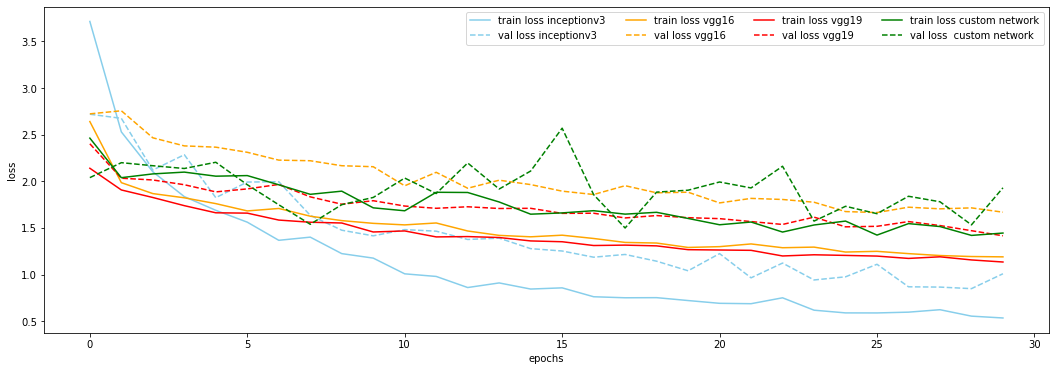

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))

plt.plot(inc_training.history['loss'], label='train loss inceptionv3',color='skyblue')
plt.plot(inc_training.history['val_loss'], label='val loss inceptionv3',linestyle='--',color='skyblue')

plt.plot(vgg_training.history['loss'], label='train loss vgg16',color='orange')
plt.plot(vgg_training.history['val_loss'], label='val loss vgg16',linestyle='--',color='orange')

plt.plot(vgg19_training.history['loss'], label='train loss vgg19',color='red')
plt.plot(vgg19_training.history['val_loss'], label='val loss vgg19',linestyle='--',color='red')

# plt.plot(resnet_training.history['loss'], label='train loss resnet',color='yellow')
# plt.plot(resnet_training.history['val_loss'], label='val loss resnet',linestyle='--',color='yellow')

plt.plot(cn_training.history['loss'], label='train loss custom network',color='green')
plt.plot(cn_training.history['val_loss'], label='val loss  custom network',linestyle='--',color='green')

plt.legend(ncol=4)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
# plt.savefig('LossVal_loss')


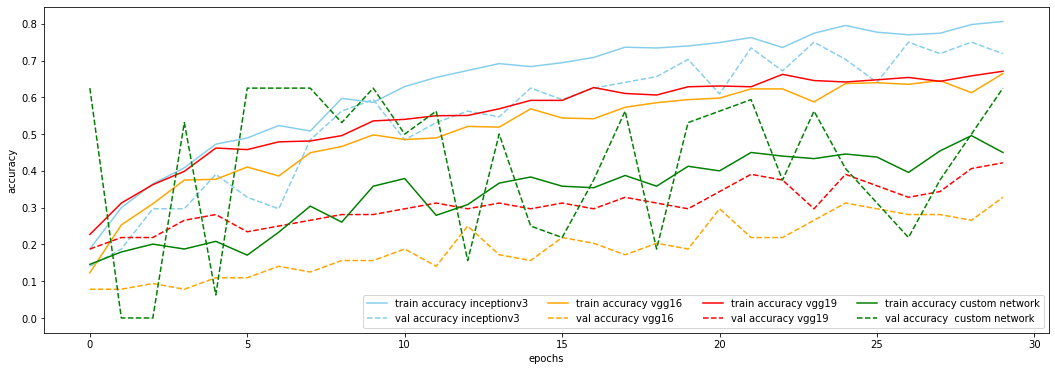

In [84]:

# plot the accuracy
# plt.plot(inc_training.history['accuracy'], label='train acc',color='g')
# plt.plot(inc_training.history['val_accuracy'], label='val acc',color='g',linestyle='--')

plt.figure(figsize=(18,6))
plt.plot(inc_training.history['accuracy'], label='train accuracy inceptionv3',color='skyblue')
plt.plot(inc_training.history['val_accuracy'], label='val accuracy inceptionv3',linestyle='--',color='skyblue')

plt.plot(vgg_training.history['accuracy'], label='train accuracy vgg16',color='orange')
plt.plot(vgg_training.history['val_accuracy'], label='val accuracy vgg16',linestyle='--',color='orange')

plt.plot(vgg19_training.history['accuracy'], label='train accuracy vgg19',color='red')
plt.plot(vgg19_training.history['val_accuracy'], label='val accuracy vgg19',linestyle='--',color='red')

# plt.plot(resnet_training.history['accuracy'], label='train accuracy resnet',color='yellow')
# plt.plot(resnet_training.history['val_accuracy'], label='val accuracy resnet',linestyle='--',color='yellow')

plt.plot(cn_training.history['accuracy'], label='train accuracy custom network',color='green')
plt.plot(cn_training.history['val_accuracy'], label='val accuracy  custom network',linestyle='--',color='green')


plt.legend(ncol=4)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.tight_layout
plt.show()